# 2ª parte: Parte técnica

### Importando as Bibliotecas Python 

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Lendo o CSV

In [42]:
df = pd.read_csv("dados_climaticos_2024_completo.csv")

In [43]:
df.head()

,data,temperatura,chuva,umidade,mes,estacao
0,2024-01-01,21.0,31.9,78.3,1,verão
1,2024-01-02,30.8,24.0,59.5,1,verão
2,2024-01-03,24.7,2.7,72.0,1,verão
3,2024-01-04,25.6,15.8,62.1,1,verão
4,2024-01-05,25.0,14.0,69.0,1,verão


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   data         365 non-null    object 
 1   temperatura  365 non-null    float64
 2   chuva        365 non-null    float64
 3   umidade      365 non-null    float64
 4   mes          365 non-null    int64  
 5   estacao      365 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 17.2+ KB


### Calculando médias e desvios padrão por estação

In [45]:
estatisticas_estacao = df.groupby("estacao")[["temperatura", "chuva"]].agg(["mean", "std"]).round(2)
print(estatisticas_estacao)

          temperatura        chuva       
                 mean   std   mean    std
estacao                                  
inverno         27.94  4.97  32.21  32.25
outono          28.08  5.45  26.74  27.50
primavera       28.45  4.41  33.56  34.68
verão           27.24  4.61  32.50  29.92


### Calculando médias e desvios padrão por mês

In [46]:
estatisticas_mes = df.groupby("mes")[["temperatura", "chuva"]].agg(["mean", "std"]).round(2)
print(estatisticas_mes)

    temperatura        chuva       
           mean   std   mean    std
mes                                
1         26.12  3.91  29.43  18.15
2         27.76  4.53  34.56  29.84
3         27.87  5.23  33.64  38.85
4         29.17  5.04  35.40  32.70
5         27.31  5.66  20.88  19.02
6         27.79  5.61  24.14  27.98
7         27.67  4.82  35.77  37.34
8         27.58  4.47  32.94  28.53
9         28.60  5.67  27.76  30.72
10        28.07  3.52  31.75  34.24
11        28.78  5.02  32.58  26.56
12        28.52  4.71  36.40  42.45


### Identificando dias com risco de enchente

In [47]:
# Definindo limiares arbitrários: chuva > 80 mm e umidade > 90%
df["risco_enchente"] = (df["chuva"] > 80) & (df["umidade"] > 90)
dias_com_risco = df[df["risco_enchente"]][["data", "chuva", "umidade"]]
print(dias_com_risco)

           data  chuva  umidade
246  2024-09-03  106.6     92.2


### Gráfico: evolução da temperatura ao longo do tempo

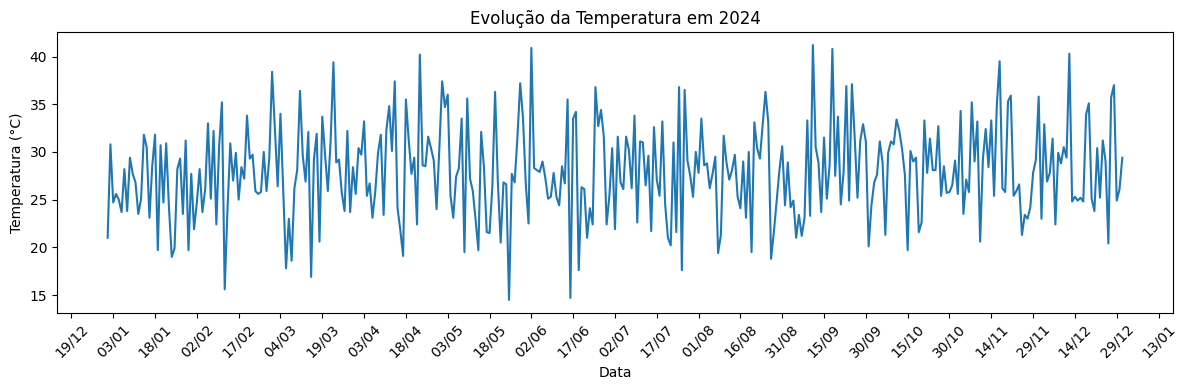

In [48]:
plt.figure(figsize=(12, 4))
sns.lineplot(x="data", y="temperatura", data=df)
plt.title("Evolução da Temperatura em 2024")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")

# Mostrar apenas 1 rótulo a cada 15 dias
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Gráfico: média de chuva por mês

C:\Users\henri\AppData\Local\Temp\ipykernel_31192\2071843185.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="mes", y="chuva", data=df, estimator='mean', ci=None)


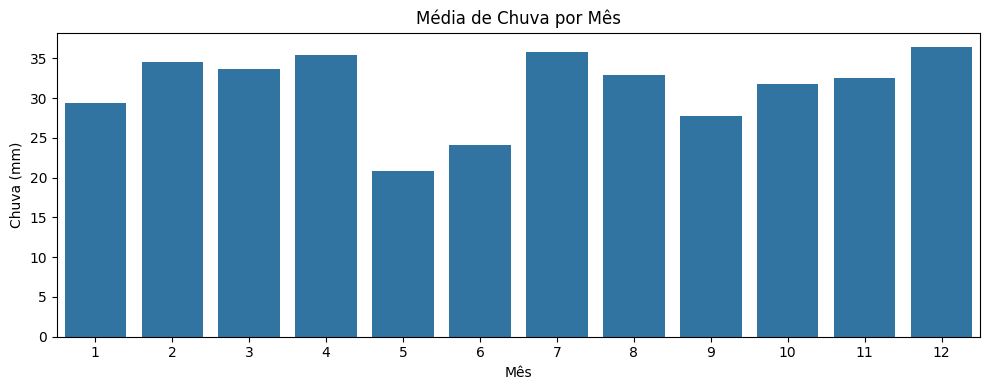

In [49]:
plt.figure(figsize=(10, 4))
sns.barplot(x="mes", y="chuva", data=df, estimator='mean', ci=None)
plt.title("Média de Chuva por Mês")
plt.xlabel("Mês")
plt.ylabel("Chuva (mm)")
plt.tight_layout()
plt.show()

### Exibindo novamente as estatísticas e dias com risco

In [50]:
print("\nEstatísticas por estação:")
print(estatisticas_estacao)
print("\nEstatísticas por mês:")
print(estatisticas_mes)
print("\nDias com risco de enchente:")
print(dias_com_risco)


Estatísticas por estação:
          temperatura        chuva       
                 mean   std   mean    std
estacao                                  
inverno         27.94  4.97  32.21  32.25
outono          28.08  5.45  26.74  27.50
primavera       28.45  4.41  33.56  34.68
verão           27.24  4.61  32.50  29.92

Estatísticas por mês:
    temperatura        chuva       
           mean   std   mean    std
mes                                
1         26.12  3.91  29.43  18.15
2         27.76  4.53  34.56  29.84
3         27.87  5.23  33.64  38.85
4         29.17  5.04  35.40  32.70
5         27.31  5.66  20.88  19.02
6         27.79  5.61  24.14  27.98
7         27.67  4.82  35.77  37.34
8         27.58  4.47  32.94  28.53
9         28.60  5.67  27.76  30.72
10        28.07  3.52  31.75  34.24
11        28.78  5.02  32.58  26.56
12        28.52  4.71  36.40  42.45

Dias com risco de enchente:
           data  chuva  umidade
246  2024-09-03  106.6     92.2
